### Problem Statement

Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected **2013 sales data for 1559 products** across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

**train (8523) and test (5681) data set**

In [1]:
# Importing the Libraries
from pyforest import *

from warnings import filterwarnings
filterwarnings('ignore')

# plot size
plt.rcParams["figure.figsize"] = [15,8]

<IPython.core.display.Javascript object>

In [2]:
# Import the Dataset

train = pd.read_csv("C:/Users/91899/Desktop/Analyatics Vidhya/Big Mart Sales/train_v9rqX0R.csv")
test = pd.read_csv("C:/Users/91899/Desktop/Analyatics Vidhya/Big Mart Sales/test_AbJTz2l.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Check the Dimensions of the data

train.shape, test.shape # Test columns will always have n-1 columns

((8523, 12), (5681, 11))

#### Exploratory Data Analysis

1. Univariate Analysis
2. Bivariate Analysis

In [4]:
train.head()

# Item Visibility has 0s which is incorrect....

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Item_Outlet_Sales'>

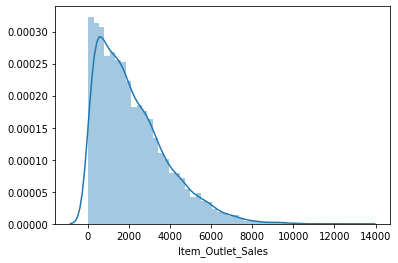

In [5]:
# Target Variable
sns.distplot(train.Item_Outlet_Sales)

In [6]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

### First Submission - Base Model

Average

In [7]:
train.Item_Outlet_Sales.mean()

2181.2889135750365

In [8]:
# Submission File

solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier, 
                         "Outlet_Identifier":test.Outlet_Identifier,
                         "Item_Outlet_Sales":train.Item_Outlet_Sales.mean()})

<IPython.core.display.Javascript object>

In [9]:
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914


In [10]:
# Export it into csv
solution.to_csv("Basemodel.csv",index = False) # name of the file with ext and index = False

### Base Model RMSE: 1773.8

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Item_Weight'>

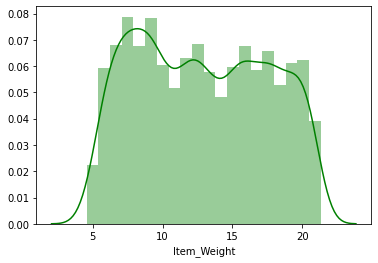

In [11]:
# Item_Weight
sns.distplot(train.Item_Weight.dropna(), color ="g")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Item_Visibility'>

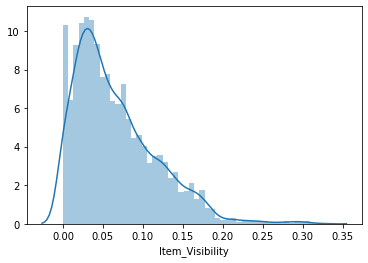

In [12]:
# Item Visibility

sns.distplot(train.Item_Visibility)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Item_Visibility'>

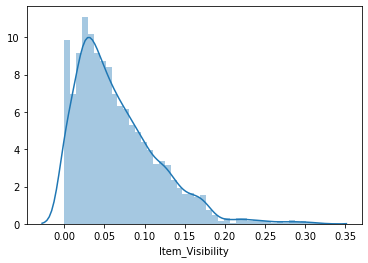

In [13]:
sns.distplot(test.Item_Visibility)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Item_MRP'>

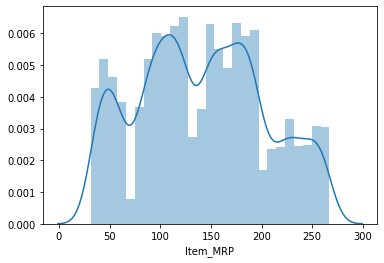

In [14]:
#Item MRP
sns.distplot(train.Item_MRP)

Inference -  ITEM_MRP has different data distribution. We will use Bivariate analysis to understand this further

In [15]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
# Single Category - Sns.countplot | value_counts and then plotting the frequency
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [17]:
# Fixing the Item Fat Content
test.Item_Fat_Content.replace(to_replace=["reg", "LF", "low fat"], 
                              value =["Regular", "Low Fat", "Low Fat"], inplace = True)

In [18]:
# Fixing the Item Fat Content
train.Item_Fat_Content.replace(to_replace=["reg", "LF", "low fat"], 
                              value =["Regular", "Low Fat", "Low Fat"], inplace = True)

<AxesSubplot:>

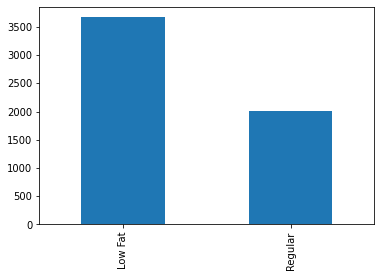

In [19]:
test.Item_Fat_Content.value_counts().plot(kind = "bar")

<AxesSubplot:>

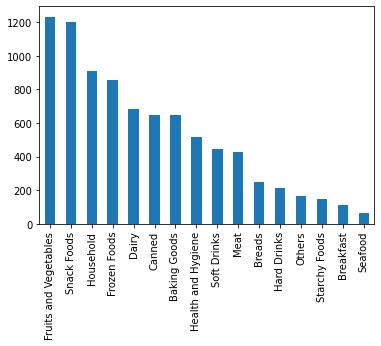

In [20]:
# Item Type

train.Item_Type.value_counts().plot(kind = "bar")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

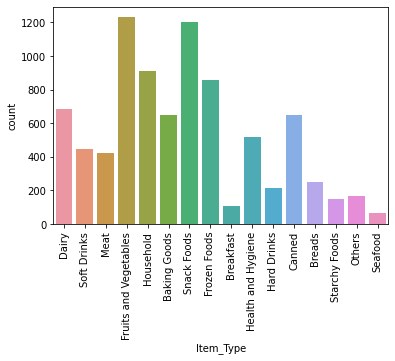

In [21]:
sns.countplot(train.Item_Type)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

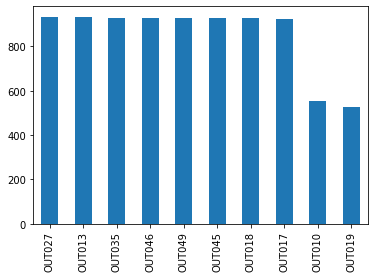

In [22]:
# Outlet ID
train.Outlet_Identifier.value_counts().plot(kind = "bar")

# Out027 has the highest frequency - Sale will also be higher for this outlet..
# Out010 and Out019 account for the lowest sales..

<AxesSubplot:>

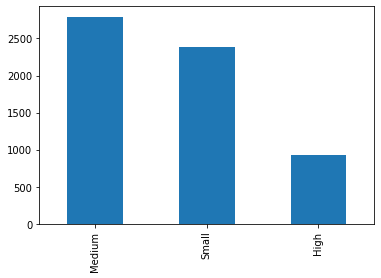

In [23]:
# Outlet Size
train.Outlet_Size.value_counts().plot(kind = "bar")

# Out027 is the medium size outlet...

In [24]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Summary of Univariate Analysis

* Mean Sales is 2100 dollars and the min and max are 33 and 13000 resp.
* Product Types - Low Fat and Regular
* Top 3 Selling Items - **Fruits and Veggies, Snack Foods and Household Items**
* The Outlet readily available is **Out027**
* Most of the Outlets are **Medium** sized outlet.
* **Tier 3** Location has the highest no of Outlets.
* **S1** is the most seen Outlet Type


### Bivariate Analysis

* Num vs Num ( Pred vs TGT)
* Cat vs Num (Cat vs TGT)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

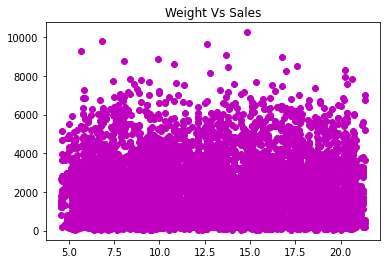

In [25]:
# Item_Weight Vs Sales
plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, c = "m")
plt.title("Weight Vs Sales")
plt.show()

# Inference -  No pattern between the weight and sales

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

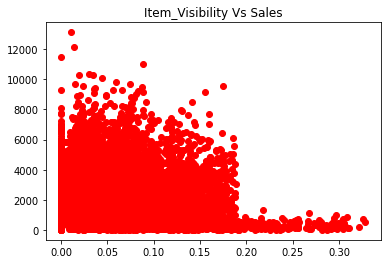

In [26]:
# Item_Visibility Vs Sales
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, c = "r")
plt.title("Item_Visibility Vs Sales")
plt.show()

# Inference - Bigger the products, lesser the sales
# A Straight Line on 0 that needs fixing...

In [27]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

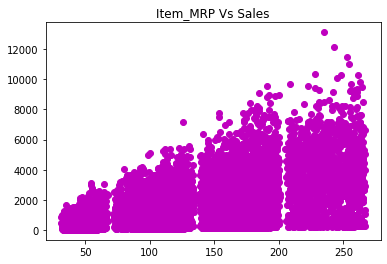

In [28]:
# Item_MRP Vs Sales
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, c = "m")
plt.title("Item_MRP Vs Sales")
plt.show()

# Inference - Bigger the products, lesser the sales
# A Straight Line on 0 that needs fixing...

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

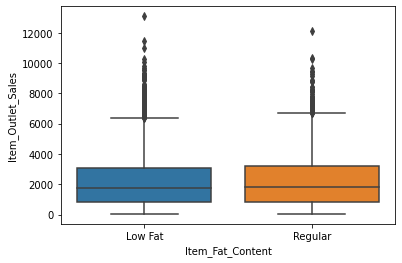

In [29]:
# Cat vs Numerical - boxplot
# Item Fat Content vs Sales
sns.boxplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales", data = train)

In [30]:
# Statistical Summary of the boxplot above
train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,5517.0,2157.711534,1697.973824,33.2900,826.2578,1765.0358,3050.69560,13086.9648
Regular,3006.0,2224.561170,1721.480865,33.9558,857.5504,1844.5989,3198.66965,12117.5600


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

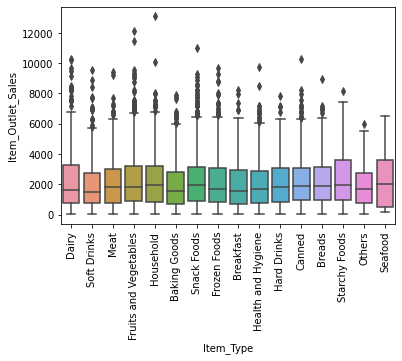

In [31]:
# Item Type vs Sales
sns.boxplot(x = "Item_Type", y = "Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

# Inf: Fast Moving Prods - Fruits and Veggies, Dairy, Household, Snack Food, Soft Drinks..

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

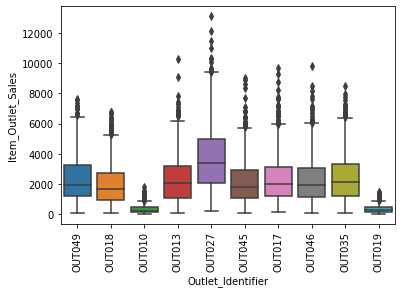

In [32]:
# Outlet ID vs Sales
sns.boxplot(x = "Outlet_Identifier", y = "Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

# Inf: Out027 and Out013 accounts for High Sales and Out010 & Out019 - Lowest Sales

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

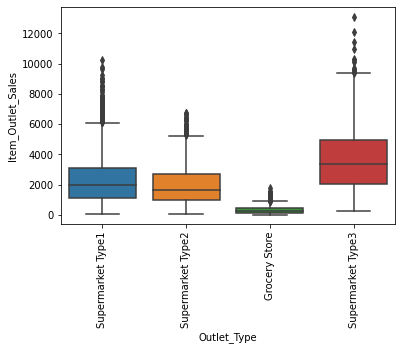

In [33]:
# Outlet Type vs Sales
sns.boxplot(x = "Outlet_Type", y = "Item_Outlet_Sales", data = train)
plt.xticks(rotation = 90)
plt.show()

# Inf: S3 followed by S1 accounts for High Sales

### Summary of Bivariate Analysis

* Low Fat Items sell more than Regular
* No pattern was found between weight and TGT
* We saw interesting pattern between visibility & TGT
* We also saw that there is a straight line at 0 in visibility plot which needs fixing.
* OUT027 & Out013 earns the biggest revenue generator label & Out10 and Out 19 are the slow movers
* S1 and S3 makes lot of money for the business.
* Fast Moving Products are Fruits & Veggies, Snacks, Soft Drinks, Households...



### Missing Values

In [34]:
train.isnull().sum()

# Item_Weight & Outlet Size same columns for both train and test

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [35]:
# Combine Train and Test
combined = pd.concat([train, test], ignore_index = True)

<IPython.core.display.Javascript object>

In [36]:
combined.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [37]:
combined.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [38]:
combined.loc[combined.Item_Type=="Dairy", "Item_Weight"].mean()

13.23835812964935

In [39]:
combined.loc[combined.Item_Identifier=="NCD19", "Item_Weight"]

4        8.93
522      8.93
802      8.93
2129     8.93
2907     8.93
3428     8.93
8672      NaN
10467    8.93
13900    8.93
Name: Item_Weight, dtype: float64

In [40]:
# Lambda
combined["Item_Weight"]=combined.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [41]:
combined.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [42]:
combined.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [43]:
combined.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2


In [44]:
combined.loc[combined.Outlet_Size.isnull(), "Outlet_Location_Type"].unique()

# Gstore and S1

array(['Tier 3', 'Tier 2'], dtype=object)

In [45]:
pd.DataFrame(combined.groupby(["Outlet_Location_Type","Outlet_Type"])["Outlet_Size"].value_counts())

<IPython.core.display.Javascript object>

Outlet_Size
Outlet_Location_Type Outlet_Type       Outlet_Size             
Tier 1               Grocery Store     Small                880
                     Supermarket Type1 Medium              1550
                                       Small               1550
Tier 2               Supermarket Type1 Small               1550
Tier 3               Supermarket Type1 High                1553
                     Supermarket Type2 Medium              1546
                     Supermarket Type3 Medium              1559

In [46]:
# NA Dataframe
combined.loc[combined.Outlet_Size.isnull(),].head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1
25,Low Fat,NCD06,45.9060,838.9080,Household,0.099887,13.000,2007,OUT017,Tier 2,NaN,Supermarket Type1
28,Regular,FDE51,45.5086,178.4344,Dairy,0.161467,5.925,1998,OUT010,Tier 3,NaN,Grocery Store


In [47]:
combined.loc[combined.Outlet_Type=="Grocery Store", "Outlet_Size"] = "Small"
combined.loc[combined.Outlet_Type=="Supermarket Type1", "Outlet_Size"] = "Small"

### Feature Engineering


In [48]:
combined.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Small,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Small,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Small,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,Small,Supermarket Type1


In [49]:
# Deal with 0s in Visibility
combined.Item_Visibility.describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [50]:
# Deal with 0s in Visibility
combined["Item_Visibility"]=combined.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(0, x.mean()))

In [51]:
combined.Item_Visibility.describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

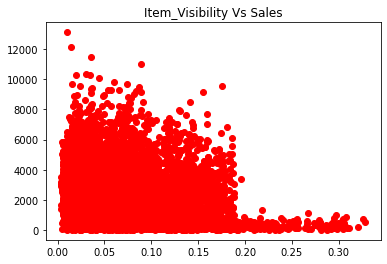

In [52]:
# Item_Visibility Vs Sales
plt.scatter(combined.Item_Visibility, combined.Item_Outlet_Sales, c = "r")
plt.title("Item_Visibility Vs Sales")
plt.show()

In [53]:
combined.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Small,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Small,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,Small,Supermarket Type1


In [54]:
# Item Type
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [55]:
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast', 'Canned','Breads', 'Starchy Foods', 'Seafood']

# Function to covert it

def perish(x):
    if(x in perishables):
        return("Perishables")
    else:
        return("Non Perishables")
    
# Apply on Item_type
combined["ItemType_Cat"] = combined.Item_Type.apply(perish)

In [56]:
# Outlet Vintage
combined["Vintage"] = 2013 - combined.Outlet_Establishment_Year

In [57]:
# Outlet_ID

def outlets(x):
    if(x =="OUT027"):
        return("OUT027")
    else:
        return("Others")
    
combined["Outlets"] = combined["Outlet_Identifier"].apply(outlets)

In [58]:
combined.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,ItemType_Cat,Vintage,Outlets
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Small,Supermarket Type1,Perishables,14,Others
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Non Perishables,4,Others
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Small,Supermarket Type1,Perishables,14,Others
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Perishables,15,Others
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,Small,Supermarket Type1,Non Perishables,26,Others


In [59]:
# Item Identifier

combined.iloc[0][1][:2]

'FD'

In [60]:
# Pattern from ItemID
mylist = []
for i in combined.Item_Identifier:
    mylist.append(i[:2])
    
combined["ItemID_Cat"] = pd.Series(mylist)

<IPython.core.display.Javascript object>

In [61]:
combined.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,ItemType_Cat,Vintage,Outlets,ItemID_Cat
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Small,Supermarket Type1,Perishables,14,Others,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Non Perishables,4,Others,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Small,Supermarket Type1,Perishables,14,Others,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Perishables,15,Others,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,Small,Supermarket Type1,Non Perishables,26,Others,NC


In [62]:
# Dropping the variables

df = combined.drop(["Item_Identifier", "Item_Type", "Outlet_Identifier", 
                   "Outlet_Establishment_Year"], axis = 1)

In [63]:
df.head() # FD - Foods and DR - Drinks

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,ItemType_Cat,Vintage,Outlets,ItemID_Cat
0,Low Fat,249.8092,3735.1380,0.016047,9.30,Tier 1,Small,Supermarket Type1,Perishables,14,Others,FD
1,Regular,48.2692,443.4228,0.019278,5.92,Tier 3,Medium,Supermarket Type2,Non Perishables,4,Others,DR
2,Low Fat,141.6180,2097.2700,0.016760,17.50,Tier 1,Small,Supermarket Type1,Perishables,14,Others,FD
3,Regular,182.0950,732.3800,0.017834,19.20,Tier 3,Small,Grocery Store,Perishables,15,Others,FD
4,Low Fat,53.8614,994.7052,0.009780,8.93,Tier 3,Small,Supermarket Type1,Non Perishables,26,Others,NC


In [64]:
# Changing Item Fat Content as per the ItemID
df.loc[df.ItemID_Cat=="NC", "Item_Fat_Content"]="Non Edible"

In [65]:
# Split the Data in Train and Test

train.shape

(8523, 12)

In [66]:
# Splitting the Data in Train and Test
newtrain = df[:8523]
newtest = df[8523:]

In [67]:
# Reset the Index
newtest = newtest.reset_index()
newtest = newtest.drop(["index", "Item_Outlet_Sales"], axis = 1)

In [68]:
newtrain.shape, newtest.shape

((8523, 12), (5681, 11))

### Model Building

In [69]:
# dummies
dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first= True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
dummytrain.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Vintage,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ItemType_Cat_Perishables,Outlets_Others,ItemID_Cat_FD,ItemID_Cat_NC
0,249.8092,3735.1380,0.016047,9.30,14,0,0,0,0,1,1,0,0,1,1,1,0
1,48.2692,443.4228,0.019278,5.92,4,0,1,0,1,0,0,1,0,0,1,0,0
2,141.6180,2097.2700,0.016760,17.50,14,0,0,0,0,1,1,0,0,1,1,1,0
3,182.0950,732.3800,0.017834,19.20,15,0,1,0,1,1,0,0,0,1,1,1,0
4,53.8614,994.7052,0.009780,8.93,26,1,0,0,1,1,1,0,0,0,1,0,1


In [71]:
pd.get_dummies(train).shape

<IPython.core.display.Javascript object>

(8523, 1602)

In [72]:
# Define x and y
X = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales

In [73]:
from sklearn.preprocessing import PowerTransformer
y = y.values.reshape((len(y),1))
boxci = PowerTransformer(method='yeo-johnson', standardize=True)
y = boxci.fit_transform(y)

In [74]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [75]:
# Validation Set comes from train set
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
ridge = Ridge(alpha = 0.5, normalize=True)
lasso = Lasso(alpha=0.5, normalize=True)

# Def a Function that will return RMSe

def rmse(y_test, pred):
    RMSE = np.sqrt(mean_squared_error(y_test, pred))
    print("RMSE: ", np.round(RMSE,4))
    
lr.fit(xtrain, ytrain)
pred_lr = lr.predict(xtest)
rmse(ytest, pred_lr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RMSE:  0.5777


In [76]:
# saving a Model
import pickle
# open a file, where you ant to store the data
file = open('lr.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)

In [77]:
result = lr.predict(dummytest)

In [78]:
# res = pd.DataFrame(pred_lr)
a_inverse_transformed = boxci.inverse_transform(result)
a_inverse_transformed

array([[1556.09679677],
       [1318.92115473],
       [ 937.94889929],
       ...,
       [1662.2202858 ],
       [3359.63042439],
       [1219.30135258]])

In [79]:
res = pd.DataFrame.from_records(data = a_inverse_transformed, columns= ['Item_Outlet_Sales'])

<IPython.core.display.Javascript object>

In [80]:
res

,Item_Outlet_Sales
0,1556.096797
1,1318.921155
2,937.948899
3,2226.023406
4,5733.762827
...,...
5676,2033.712046
5677,2120.226694
5678,1662.220286
5679,3359.630424


In [81]:
# Submission dataframe

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                         "Outlet_Identifier": test.Outlet_Identifier})

<IPython.core.display.Javascript object>

In [82]:
sol = pd.concat([solution, res], axis =1)

<IPython.core.display.Javascript object>

In [83]:
#Export the DF
sol.to_csv("LRModel.csv", index = False) # RMSE:

In [84]:
from sklearn.ensemble import BaggingRegressor
bagg = BaggingRegressor()
bagg.fit(xtrain, ytrain)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [85]:
pred1 = bagg.predict(xtest)

In [86]:
rmse(ytest, pred1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RMSE:  0.6284


In [87]:
pred = bagg.predict(dummytest)
pred

array([-0.24390888, -0.19182199, -0.68775796, ..., -0.1165903 ,
        1.03269166, -0.25873879])

In [88]:
pred = pd.DataFrame(data = pred, columns= ['Item_Outlet_Sales'])

<IPython.core.display.Javascript object>

In [89]:
a_inverse_transformed = boxci.inverse_transform(pred)
a_inverse_transformed

array([[1382.89240371],
       [1453.54300848],
       [ 869.88343131],
       ...,
       [1559.68996569],
       [3858.10970375],
       [1363.19632109]])

In [103]:
prede = pd.DataFrame(data = a_inverse_transformed, columns= ['Item_Outlet_Sales'])

<IPython.core.display.Javascript object>

In [101]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier, 
                         "Outlet_Identifier":test.Outlet_Identifier})

<IPython.core.display.Javascript object>

In [105]:
sol_bagg = pd.concat([solution, prede], axis = 1)

<IPython.core.display.Javascript object>

In [185]:
solution.Item_Outlet_Sales.describe()

count    5681.000000
mean     2181.915884
std      1165.928787
min      -941.396379
25%      1385.453346
50%      2131.179284
75%      2979.084359
max      5419.485848
Name: Item_Outlet_Sales, dtype: float64

In [106]:
sol_bagg.to_csv("Baggingmodel.csv", index = False) # RMSE: 1280

# Intercept + Slope is showing

<IPython.core.display.Javascript object>

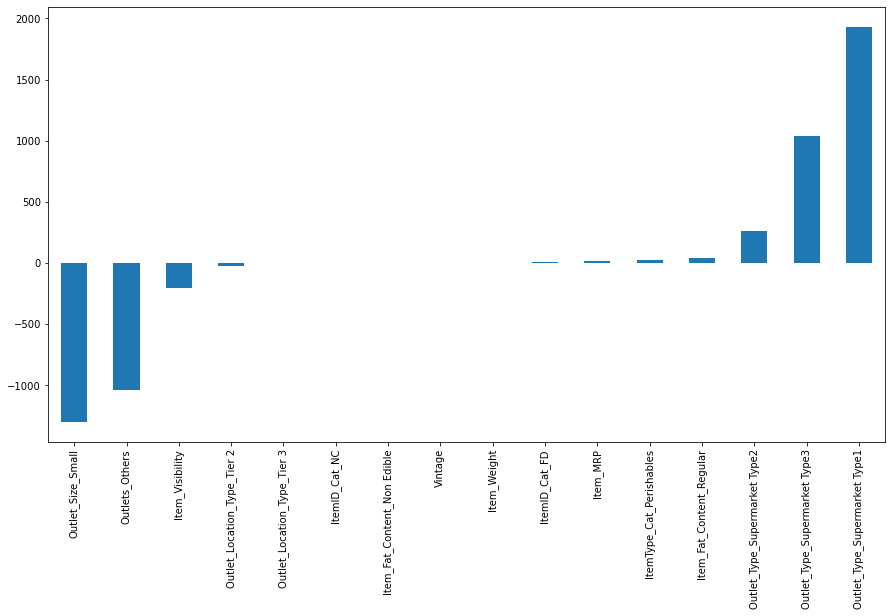

In [189]:
# Regression Coefficient
pd.Series(lrreg.coef_, X.columns).sort_values().plot(kind = "bar")

### About Regularization

Some Predictors get high weightage in comparison to others. Hence, the model is overfitting when it comes to these features. It is not the correct thing because the model is not giving due importance to the other features and hence we need to introduce **Regularization**


Regularization will introduce a parameter called **alpha**. This is also called as Shrinkage Parameter. It will shrink the Parameters which have very high value and will normalize it.

There are 2 Regularization Techniques which are **L1** and **L2** Regularization and are popularly known as Lasso and Ridge Regression

In [90]:
#Regressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from catboost import CatBoostRegressor
#Evalution Metrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [91]:
et = ExtraTreesRegressor(n_jobs=-1,n_estimators=500)
rf = RandomForestRegressor(max_depth=8,bootstrap=True,n_jobs=-1,n_estimators=200,max_features='sqrt')
xgb = xgboost.XGBRegressor(n_jobs=-1,colsample_bytree=0.7, learning_rate=0.07,max_depth=5, min_child_weight=4, n_estimators=500,nthread=4, subsample=0.7)
gbr = GradientBoostingRegressor(random_state=0)
xgb = xgboost.XGBRegressor(n_jobs=-1)
et = ExtraTreesRegressor(n_jobs=-1)
rf = RandomForestRegressor(n_jobs=-1)
ds = DecisionTreeRegressor()

In [92]:
reg = {
"LinearRegression": LinearRegression(),
"KNeighborsRegressor":KNeighborsRegressor(n_neighbors=2),
"AdaBoostRegressor":AdaBoostRegressor(random_state=0, n_estimators=100),
"Ridge": Ridge(alpha=1.0),
"ElasticNet":ElasticNet(random_state=0),
"GradientBoostingRegressor":GradientBoostingRegressor(random_state=0),
"DecisionTreeRegressor": DecisionTreeRegressor(),
"ExtraTreesRegressor": ExtraTreesRegressor(n_jobs=-1),
"RandomForestRegressor": RandomForestRegressor(n_jobs=-1),
"XGBRegressor":xgboost.XGBRegressor(n_jobs=-1),
"CatBoostRegressor":CatBoostRegressor(iterations=900, depth=5, learning_rate=0.05,loss_function = 'RMSE')
#"VottingRegressor": VotingRegressor([('rf', rf),('xgb',xgb),('et',et)],n_jobs=-1)
#"Stcking" : StackingRegressor(estimators=[('et', et),('xgb',xgb),('rf',rf)], final_estimator=LinearRegression(), cv=5)
}

In [93]:
%%time
dic =  {"Model":[],"R2score":[],"RMSE":[]}
for name, model in reg.items():
    if name == 'CatBoostRegressor':
        model.fit(xtrain, ytrain,verbose=False)
    else:
        model.fit(xtrain, ytrain)
    #y_test_pre = model.predict(test_df)
    pred = model.predict(xtest)
    r2score = r2_score(ytest, pred)
    rmse  = np.sqrt(mean_squared_error(ytest, pred))
    print("--------------------------------------------------------------")
    print("Model:", name)
    print("-----Training Data Evalution-----")
    # print("R2 Value on train: ", r2scores)
    print("R2 Value on test: ", r2score)
    print("RMSE on test: ", rmse)
    dic["Model"].append(name)
    dic["R2score"].append(r2score)
    dic["RMSE"].append(rmse)

<IPython.core.display.Javascript object>

--------------------------------------------------------------
Model: LinearRegression
-----Training Data Evalution-----
R2 Value on test:  0.6827564979967203
RMSE on test:  0.5776837058860421


<IPython.core.display.Javascript object>

--------------------------------------------------------------
Model: KNeighborsRegressor
-----Training Data Evalution-----
R2 Value on test:  0.3117427520948619
RMSE on test:  0.8508816290685951


<IPython.core.display.Javascript object>

--------------------------------------------------------------
Model: AdaBoostRegressor
-----Training Data Evalution-----
R2 Value on test:  0.5886243507291069
RMSE on test:  0.6578290386971147


<IPython.core.display.Javascript object>

--------------------------------------------------------------
Model: Ridge
-----Training Data Evalution-----
R2 Value on test:  0.6828044086448267
RMSE on test:  0.5776400828557546


<IPython.core.display.Javascript object>

--------------------------------------------------------------
Model: ElasticNet
-----Training Data Evalution-----
R2 Value on test:  0.3109031554580939
RMSE on test:  0.8514004609572944


<IPython.core.display.Javascript object>

--------------------------------------------------------------
Model: GradientBoostingRegressor
-----Training Data Evalution-----
R2 Value on test:  0.6970181376919737
RMSE on test:  0.5645495501815656


<IPython.core.display.Javascript object>

--------------------------------------------------------------
Model: DecisionTreeRegressor
-----Training Data Evalution-----
R2 Value on test:  0.3733404246324018
RMSE on test:  0.8119131779786175


<IPython.core.display.Javascript object>

--------------------------------------------------------------
Model: ExtraTreesRegressor
-----Training Data Evalution-----
R2 Value on test:  0.6045086703136813
RMSE on test:  0.645003741437198


<IPython.core.display.Javascript object>

--------------------------------------------------------------
Model: RandomForestRegressor
-----Training Data Evalution-----
R2 Value on test:  0.6332403145429105
RMSE on test:  0.6211329181730384


<IPython.core.display.Javascript object>

--------------------------------------------------------------
Model: XGBRegressor
-----Training Data Evalution-----
R2 Value on test:  0.6520874031720503
RMSE on test:  0.6049630186855594


<IPython.core.display.Javascript object>

--------------------------------------------------------------
Model: CatBoostRegressor
-----Training Data Evalution-----
R2 Value on test:  0.6834724711187997
RMSE on test:  0.5770314630033029
Wall time: 5.43 s


In [94]:
res = pd.DataFrame(dic).sort_values(by = "R2score", ascending = False)
res

<IPython.core.display.Javascript object>

,Model,R2score,RMSE
5,GradientBoostingRegressor,0.697018,0.564550
10,CatBoostRegressor,0.683472,0.577031
3,Ridge,0.682804,0.577640
0,LinearRegression,0.682756,0.577684
9,XGBRegressor,0.652087,0.604963
8,RandomForestRegressor,0.633240,0.621133
7,ExtraTreesRegressor,0.604509,0.645004
2,AdaBoostRegressor,0.588624,0.657829
6,DecisionTreeRegressor,0.373340,0.811913
1,KNeighborsRegressor,0.311743,0.850882


In [95]:
gbr.fit(xtrain, ytrain)
sol = gbr.predict(dummytest)

In [96]:
sol1 = pd.DataFrame(sol)

<IPython.core.display.Javascript object>

In [97]:
a_inverse_transformed = boxci.inverse_transform(sol1)
a_inverse_transformed

array([[1518.71706204],
       [1348.16206652],
       [ 620.92881077],
       ...,
       [1700.8942137 ],
       [3303.43111774],
       [1103.84389045]])

In [98]:
prede = pd.DataFrame(data = a_inverse_transformed, columns= ['Item_Outlet_Sales'])
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier, 
                         "Outlet_Identifier":test.Outlet_Identifier})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
res1 = pd.concat([solution,prede], axis =1)

<IPython.core.display.Javascript object>

In [100]:
res1

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1518.717062
1,FDW14,OUT017,1348.162067
2,NCN55,OUT010,620.928811
3,FDQ58,OUT017,2385.718948
4,FDY38,OUT027,5671.755119
...,...,...,...
5676,FDB58,OUT046,1917.427343
5677,FDD47,OUT018,2104.970741
5678,NCO17,OUT045,1700.894214
5679,FDJ26,OUT017,3303.431118


In [102]:
res1.to_csv("GradientBoosting Model1.csv", index = False)

In [103]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in extra tree
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 8)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4, 5, 10]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [105]:
gbr = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = 1)

In [106]:
gbr.fit(xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30, total=   0.9s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30, total=   0.9s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30, total=   0.8s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30, total=   0.8s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30, total=   1.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=2, max_features=log2, max_depth=30, total=   2.0s
[CV] n_estimators=100, min_samples

[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   4.8s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   4.8s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   4.7s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   4.7s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=4, max_features=sqrt, max_depth=25, total=   4.7s
[CV] n_estimators=500, min_samples

[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   7.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   6.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   6.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   6.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   6.4s
[CV] n_estimators=900, min_samples_split=10

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.2min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                           

In [111]:
gbr.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 5}

In [112]:
prediction = gbr.predict(xtest)

In [113]:
from sklearn.metrics import mean_squared_error
print(r2_score(ytest, prediction))
print("RMSE: ", np.sqrt(mean_squared_error(ytest, prediction)))

0.6898095026058346


<IPython.core.display.Javascript object>

RMSE:  0.5712260372535759
